In [1]:
import pandas as pd
import numpy as np

In [9]:
pip install mysql-connector-python sqlalchemy pymysql

In [21]:
!pip install sqlparse


   ---------------------------------------- 0.0/44.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/44.4 kB ? eta -:--:--
   --------- ------------------------------ 10.2/44.4 kB ? eta -:--:--
   --------- ------------------------------ 10.2/44.4 kB ? eta -:--:--
   ------------------------------------ --- 41.0/44.4 kB 281.8 kB/s eta 0:00:01
   ---------------------------------------- 44.4/44.4 kB 219.1 kB/s eta 0:00:00


In [30]:
from sqlalchemy import create_engine
from urllib.parse import quote_plus
from getpass import getpass

user = 'root'
raw_password = getpass("Enter MySQL password: ")
encoded_password = quote_plus(raw_password)  # this encodes @, $, etc.
host = '127.0.0.1'
port = 3306
database = 'employee_attrition'

connection_url = f"mysql+pymysql://{user}:{encoded_password}@{host}:{port}/{database}"

engine = create_engine(connection_url)

# Test connection
with engine.connect() as conn:
    print("✅ Connected successfully to MySQL!")


Enter MySQL password:  ········


✅ Connected successfully to MySQL!


In [31]:
with open("IBM-employee-attrition-2.sql", "r", encoding='utf-8-sig') as f:
    sql_script = f.readlines()

# Remove commented lines and join
cleaned_script = "\n".join([line for line in sql_script if not line.strip().startswith("--")])


In [32]:
import sqlparse
from sqlalchemy import text

statements = sqlparse.split(cleaned_script)

select_outputs = []
with engine.connect() as conn:
    for stmt in statements:
        stmt = stmt.strip()
        if stmt.lower().startswith("select"):
            try:
                df = pd.read_sql(text(stmt), conn)
                select_outputs.append(df)
            except Exception as e:
                print(f" Error in query:\n{stmt[:80]}...\n→ {e}")


In [33]:
print(f" Total SELECT queries executed: {len(select_outputs)}")
for i, df in enumerate(select_outputs):
    print(f"DataFrame {i}: {df.shape[0]} rows × {df.shape[1]} columns")


 Total SELECT queries executed: 25
DataFrame 0: 1470 rows × 29 columns
DataFrame 1: 1 rows × 3 columns
DataFrame 2: 9 rows × 4 columns
DataFrame 3: 3 rows × 4 columns
DataFrame 4: 2 rows × 4 columns
DataFrame 5: 4 rows × 4 columns
DataFrame 6: 4 rows × 4 columns
DataFrame 7: 2 rows × 4 columns
DataFrame 8: 2 rows × 2 columns
DataFrame 9: 1470 rows × 1 columns
DataFrame 10: 5 rows × 4 columns
DataFrame 11: 1470 rows × 1 columns
DataFrame 12: 4 rows × 4 columns
DataFrame 13: 16 rows × 1 columns
DataFrame 14: 4 rows × 4 columns
DataFrame 15: 3 rows × 4 columns
DataFrame 16: 3 rows × 4 columns
DataFrame 17: 4 rows × 4 columns
DataFrame 18: 4 rows × 4 columns
DataFrame 19: 4 rows × 4 columns
DataFrame 20: 6 rows × 5 columns
DataFrame 21: 36 rows × 5 columns
DataFrame 22: 2 rows × 3 columns
DataFrame 23: 4 rows × 4 columns
DataFrame 24: 6 rows × 5 columns


In [34]:
print(f"Total DataFrames created: {len(select_outputs)}")


Total DataFrames created: 25


In [35]:
df = select_outputs[2]
print(df.columns.tolist())
df.head()


['JobRole', 'total_employees', 'employees_left', 'attrition_rate_percent']


,JobRole,total_employees,employees_left,attrition_rate_percent
0,Sales Representative,83,33.0,39.76
1,Laboratory Technician,259,62.0,23.94
2,Human Resources,52,12.0,23.08
3,Sales Executive,326,57.0,17.48
4,Research Scientist,292,47.0,16.10


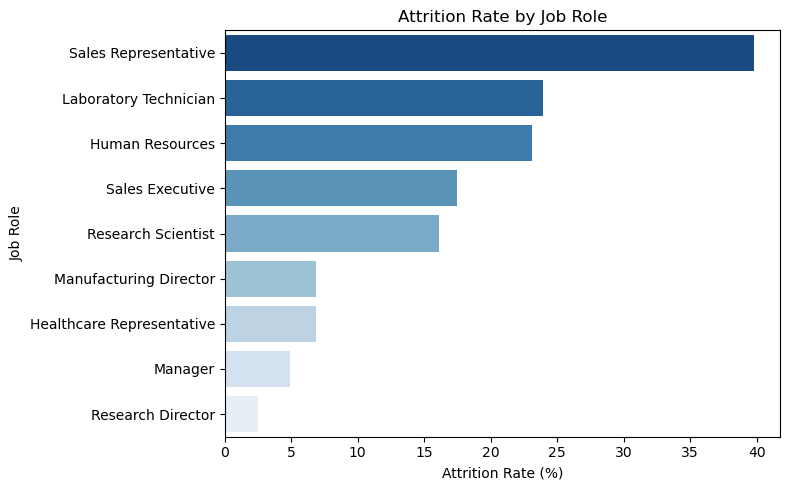

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Convert attrition_rate_percent to float if it's not already
df['attrition_rate_percent'] = df['attrition_rate_percent'].astype(float)

sns.barplot(data=df, x='attrition_rate_percent', y='JobRole', palette='Blues_r')

plt.title("Attrition Rate by Job Role")
plt.xlabel("Attrition Rate (%)")
plt.ylabel("Job Role")
plt.tight_layout()
plt.show()


In [37]:
df = select_outputs[3]
print(df.columns.tolist())
df.head()

['Department', 'total_employees', 'employees_left', 'attrition_rate_percent']


,Department,total_employees,employees_left,attrition_rate_percent
0,Sales,446,92.0,20.63
1,Human Resources,63,12.0,19.05
2,Research & Development,961,133.0,13.84


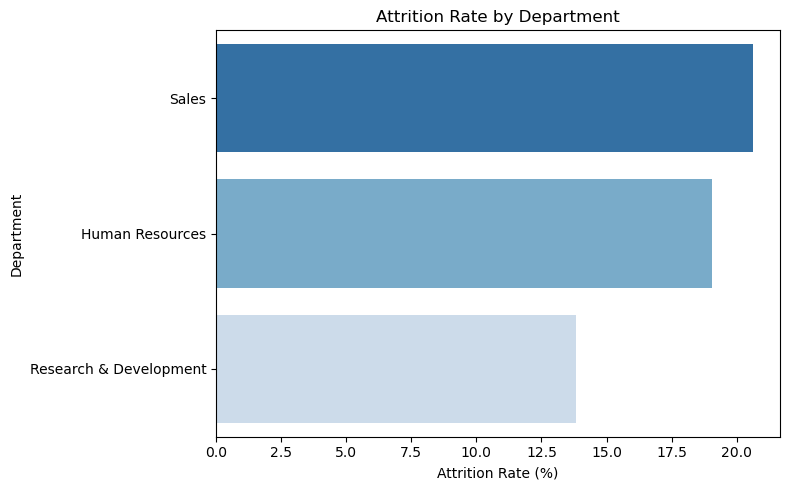

In [38]:
plt.figure(figsize=(8, 5))

# Convert attrition_rate_percent to float if it's not already
df['attrition_rate_percent'] = df['attrition_rate_percent'].astype(float)

sns.barplot(data=df, x='attrition_rate_percent', y='Department', palette='Blues_r')

plt.title("Attrition Rate by Department")
plt.xlabel("Attrition Rate (%)")
plt.ylabel("Department")
plt.tight_layout()
plt.show()


In [39]:
df = select_outputs[4]
print(df.columns.tolist())
df.head()

['Gender', 'total_employees', 'employees_left', 'attrition_rate_percent']


,Gender,total_employees,employees_left,attrition_rate_percent
0,Male,882,150.0,17.01
1,Female,588,87.0,14.80


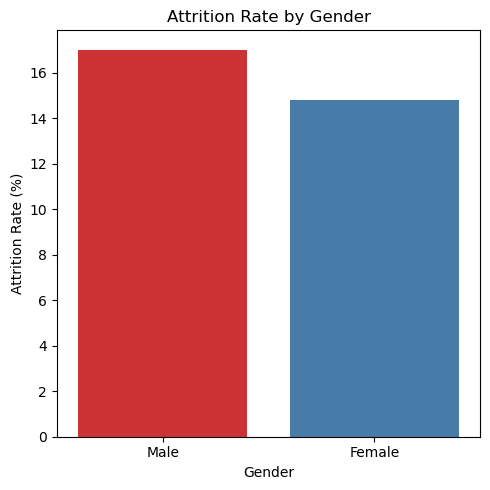

In [40]:
plt.figure(figsize=(5, 5))

# Convert attrition_rate_percent to float if it's not already
df['attrition_rate_percent'] = df['attrition_rate_percent'].astype(float)

sns.barplot(data=df, x='Gender', y='attrition_rate_percent', palette= 'Set1')

plt.title("Attrition Rate by Gender")
plt.ylabel("Attrition Rate (%)")
plt.xlabel("Gender")
plt.tight_layout()
plt.show()

In [41]:
df = select_outputs[5]
print(df.columns.tolist())
df.head()

['JobSatisfaction', 'total_employees', 'employees_left', 'attrition_rate_percent']


,JobSatisfaction,total_employees,employees_left,attrition_rate_percent
0,1,289,66.0,22.84
1,3,442,73.0,16.52
2,2,280,46.0,16.43
3,4,459,52.0,11.33


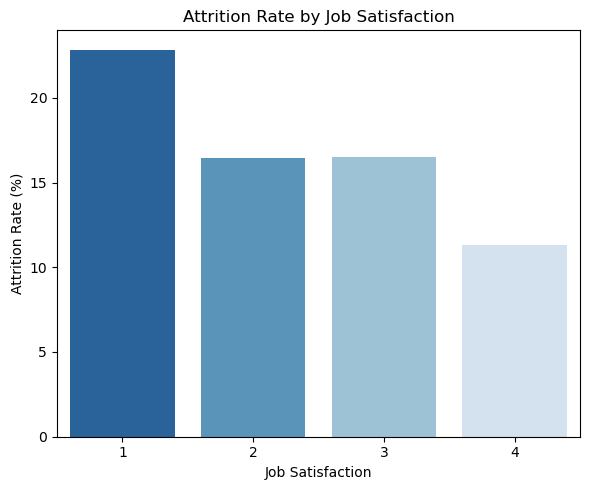

In [42]:
plt.figure(figsize=(6, 5))

# Convert attrition_rate_percent to float if it's not already
df['attrition_rate_percent'] = df['attrition_rate_percent'].astype(float)

sns.barplot(data=df, x='JobSatisfaction', y='attrition_rate_percent', palette='Blues_r')

plt.title("Attrition Rate by Job Satisfaction")
plt.xlabel("Job Satisfaction")
plt.ylabel("Attrition Rate (%)")
plt.tight_layout()
plt.show()

In [43]:
df = select_outputs[6]
print(df.columns.tolist())
df.head()

['EnvironmentSatisfaction', 'total_employees', 'employees_left', 'attrition_rate_percent']


,EnvironmentSatisfaction,total_employees,employees_left,attrition_rate_percent
0,1,284,72.0,25.35
1,2,287,43.0,14.98
2,3,453,62.0,13.69
3,4,446,60.0,13.45


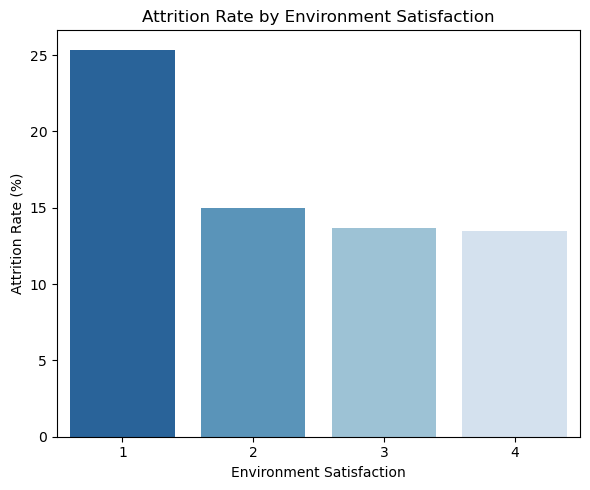

In [44]:
plt.figure(figsize=(6, 5))

# Convert attrition_rate_percent to float if it's not already
df['attrition_rate_percent'] = df['attrition_rate_percent'].astype(float)

sns.barplot(data=df, x='EnvironmentSatisfaction', y='attrition_rate_percent', palette='Blues_r')

plt.title("Attrition Rate by Environment Satisfaction")
plt.xlabel("Environment Satisfaction")
plt.ylabel("Attrition Rate (%)")
plt.tight_layout()
plt.show()

In [45]:
df = select_outputs[7]
print(df.columns.tolist())
df.head()

['OverTime', 'total_employees', 'employees_left', 'attrition_rate_percent']


,OverTime,total_employees,employees_left,attrition_rate_percent
0,Yes,416,127.0,30.53
1,No,1054,110.0,10.44


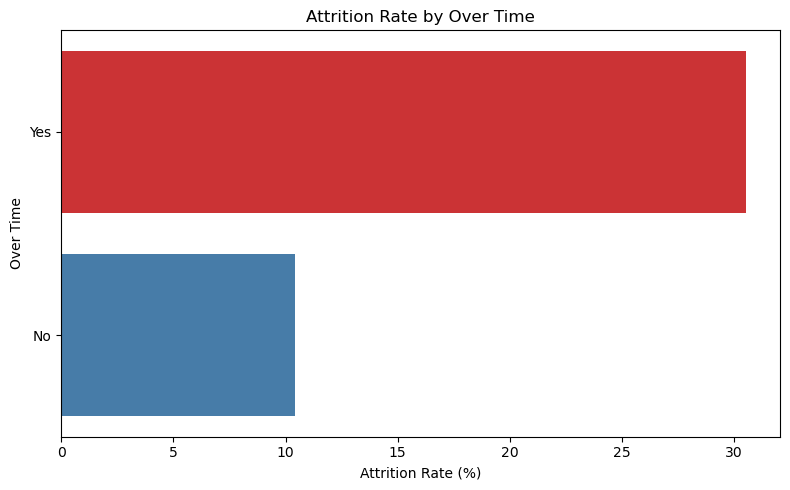

In [46]:
plt.figure(figsize=(8, 5))

# Convert attrition_rate_percent to float if it's not already
df['attrition_rate_percent'] = df['attrition_rate_percent'].astype(float)

sns.barplot(data=df, x='attrition_rate_percent', y='OverTime', palette= 'Set1')

plt.title("Attrition Rate by Over Time")
plt.xlabel("Attrition Rate (%)")
plt.ylabel("Over Time")
plt.tight_layout()
plt.show()

In [47]:
df = select_outputs[8]
print(df.columns.tolist())
df.head()

['Attrition', 'avg_income']


,Attrition,avg_income
0,Yes,4787.09
1,No,6832.74


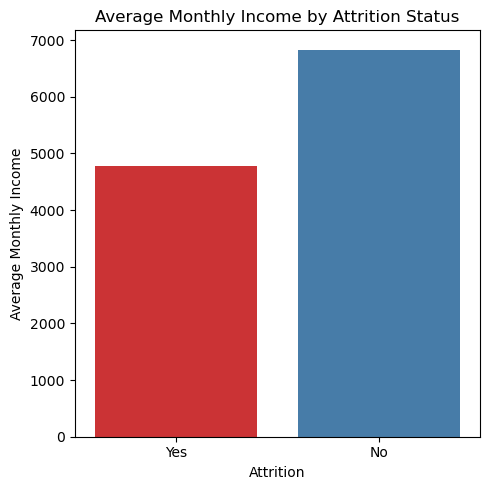

In [48]:
# Barplot
plt.figure(figsize=(5, 5))
sns.barplot(data=df, x='Attrition', y='avg_income', palette='Set1')
plt.title('Average Monthly Income by Attrition Status')
plt.xlabel('Attrition')
plt.ylabel('Average Monthly Income')
plt.tight_layout()
plt.show()


In [49]:
df = select_outputs[10]
print(df.columns.tolist())
df.head()

['Age_Group', 'total_employees', 'employees_left', 'attrition_rate_percent']


,Age_Group,total_employees,employees_left,attrition_rate_percent
0,Young Professionals,97,38.0,39.18
1,Early Career,554,112.0,20.22
2,Senior Professionals,69,11.0,15.94
3,Late Career,245,25.0,10.20
4,Mid Career,505,51.0,10.10


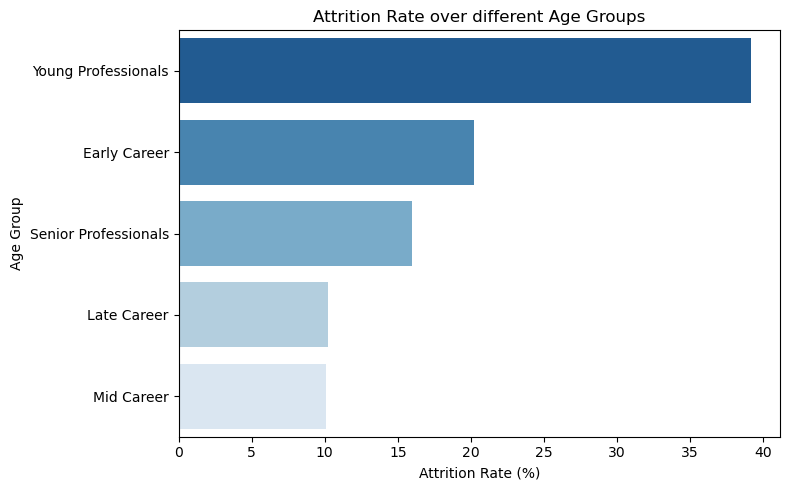

In [50]:
plt.figure(figsize=(8, 5))

# Convert attrition_rate_percent to float if it's not already
df['attrition_rate_percent'] = df['attrition_rate_percent'].astype(float)

sns.barplot(data=df, x='attrition_rate_percent', y='Age_Group', palette='Blues_r')

plt.title("Attrition Rate over different Age Groups")
plt.xlabel("Attrition Rate (%)")
plt.ylabel("Age Group")
plt.tight_layout()
plt.show()

In [51]:
df = select_outputs[12]
print(df.columns.tolist())
df.head()

['DistanceGroup', 'total_employees', 'employees_left', 'attrition_rate_percent']


,DistanceGroup,total_employees,employees_left,attrition_rate_percent
0,Far,204,45.0,22.06
1,Moderate Distance,240,48.0,20.00
2,Close,394,57.0,14.47
3,Very Close,632,87.0,13.77


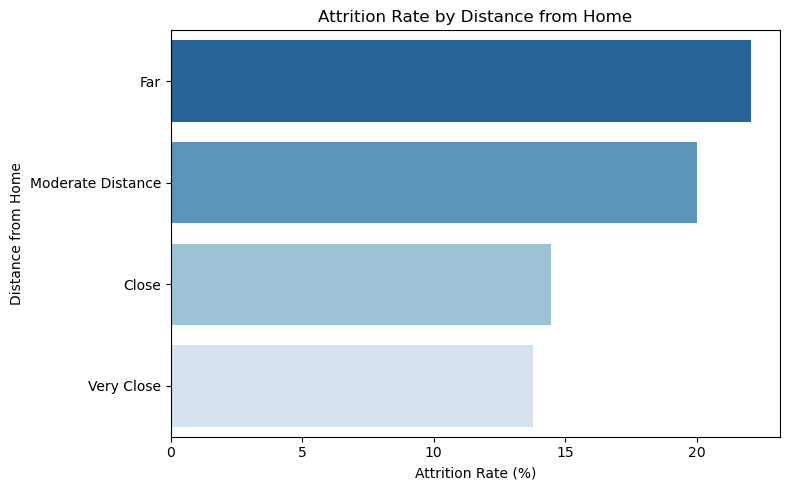

In [52]:
plt.figure(figsize=(8, 5))

# Convert attrition_rate_percent to float if it's not already
df['attrition_rate_percent'] = df['attrition_rate_percent'].astype(float)

sns.barplot(data=df, x='attrition_rate_percent', y='DistanceGroup', palette='Blues_r')

plt.title("Attrition Rate by Distance from Home")
plt.xlabel("Attrition Rate (%)")
plt.ylabel("Distance from Home")
plt.tight_layout()
plt.show()

In [53]:
df = select_outputs[14]
print(df.columns.tolist())
df.head()

['PromotionStatus', 'total_employees', 'employees_left', 'attrition_rate_percent']


,PromotionStatus,total_employees,employees_left,attrition_rate_percent
0,Recently Promoted,581,110.0,18.93
1,Long Overdue,183,29.0,15.85
2,Waiting Short-Term,568,85.0,14.96
3,Delayed promotion,138,13.0,9.42


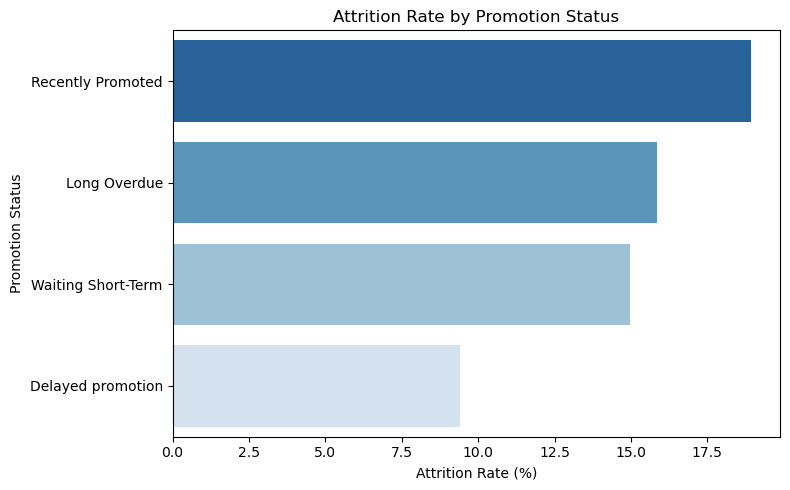

In [54]:
plt.figure(figsize=(8, 5))

# Convert attrition_rate_percent to float if it's not already
df['attrition_rate_percent'] = df['attrition_rate_percent'].astype(float)

sns.barplot(data=df, x='attrition_rate_percent', y='PromotionStatus', palette='Blues_r')

plt.title("Attrition Rate by Promotion Status")
plt.xlabel("Attrition Rate (%)")
plt.ylabel("Promotion Status")
plt.tight_layout()
plt.show()

In [55]:
df = select_outputs[15]
print(df.columns.tolist())
df.head()

['BusinessTravel', 'total_employees', 'employees_left', 'attrition_rate_percent']


,BusinessTravel,total_employees,employees_left,attrition_rate_percent
0,Travel_Frequently,277,69.0,24.91
1,Travel_Rarely,1043,156.0,14.96
2,Non-Travel,150,12.0,8.00


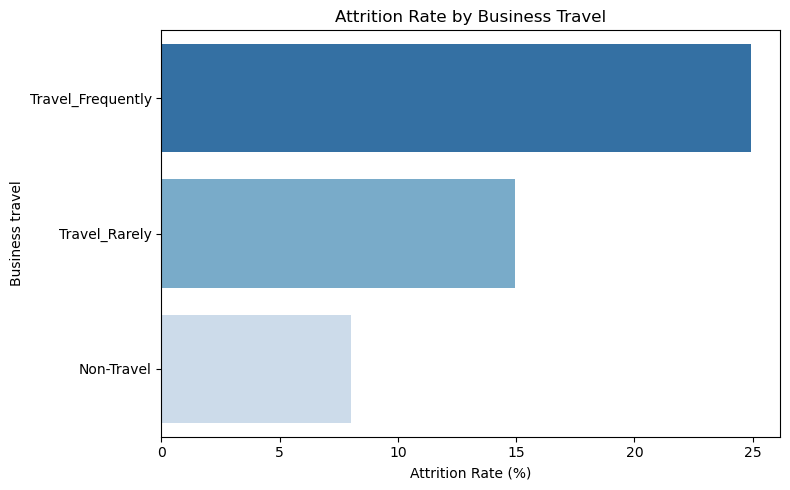

In [56]:
plt.figure(figsize=(8, 5))

# Convert attrition_rate_percent to float if it's not already
df['attrition_rate_percent'] = df['attrition_rate_percent'].astype(float)

sns.barplot(data=df, x='attrition_rate_percent', y='BusinessTravel', palette='Blues_r')

plt.title("Attrition Rate by Business Travel")
plt.xlabel("Attrition Rate (%)")
plt.ylabel("Business travel")
plt.tight_layout()
plt.show()

In [57]:
df = select_outputs[16]
print(df.columns.tolist())
df.head()

['MaritalStatus', 'total_employees', 'employees_left', 'attrition_rate_percent']


,MaritalStatus,total_employees,employees_left,attrition_rate_percent
0,Single,470,120.0,25.53
1,Married,673,84.0,12.48
2,Divorced,327,33.0,10.09


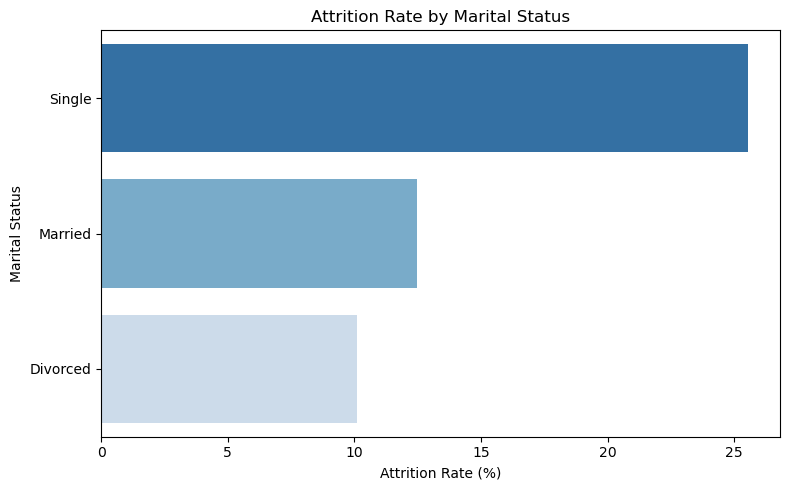

In [58]:
plt.figure(figsize=(8, 5))

# Convert attrition_rate_percent to float if it's not already
df['attrition_rate_percent'] = df['attrition_rate_percent'].astype(float)

sns.barplot(data=df, x='attrition_rate_percent', y='MaritalStatus', palette='Blues_r')

plt.title("Attrition Rate by Marital Status")
plt.xlabel("Attrition Rate (%)")
plt.ylabel("Marital Status")
plt.tight_layout()
plt.show()

In [59]:
df = select_outputs[17]
print(df.columns.tolist())
df.head()

['RelationshipSatisfaction', 'total_employees', 'employees_left', 'attrition_rate_percent']


,RelationshipSatisfaction,total_employees,employees_left,attrition_rate_percent
0,1,276,57.0,20.65
1,3,459,71.0,15.47
2,2,303,45.0,14.85
3,4,432,64.0,14.81


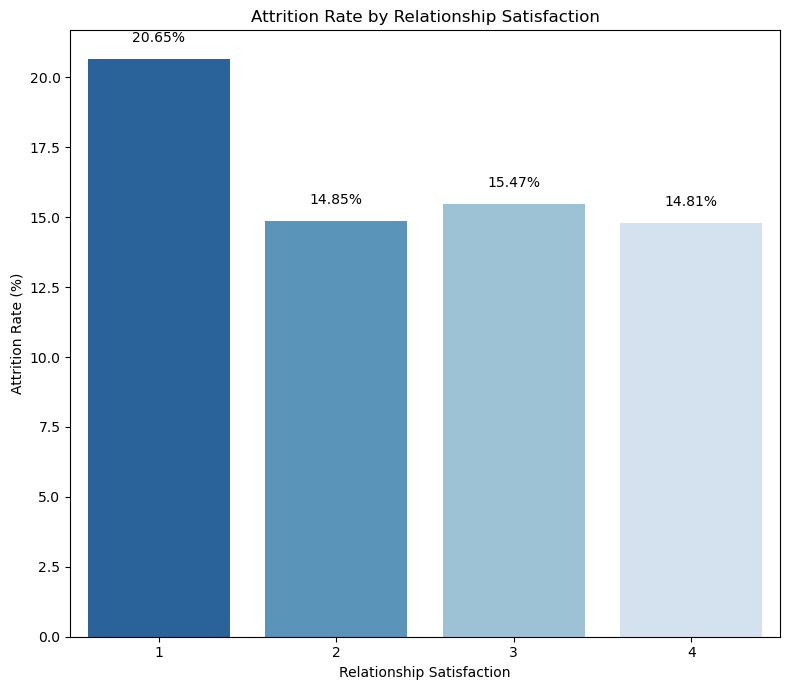

In [60]:
plt.figure(figsize=(8, 7))

# Convert attrition_rate_percent to float if it's not already
df['attrition_rate_percent'] = df['attrition_rate_percent'].astype(float)

chart = sns.barplot(data=df, x='RelationshipSatisfaction',y='attrition_rate_percent', palette='Blues_r')

for p in chart.patches:
    height = p.get_height()
    chart.text(
        p.get_x() + p.get_width() / 2.,  # center of bar
        height + 0.5,                    # a little above the bar
        f'{height:.2f}%',                # format with 2 decimals + %
        ha='center', va='bottom', fontsize=10
    )


plt.title("Attrition Rate by Relationship Satisfaction")
plt.ylabel("Attrition Rate (%)")
plt.xlabel("Relationship Satisfaction")
plt.tight_layout()
plt.show()

In [61]:
df = select_outputs[18]
print(df.columns.tolist())
df.head()

['WorkLifeBalance', 'total_employees', 'employees_left', 'attrition_rate_percent']


,WorkLifeBalance,total_employees,employees_left,attrition_rate_percent
0,1,80,25.0,31.25
1,4,153,27.0,17.65
2,2,344,58.0,16.86
3,3,893,127.0,14.22


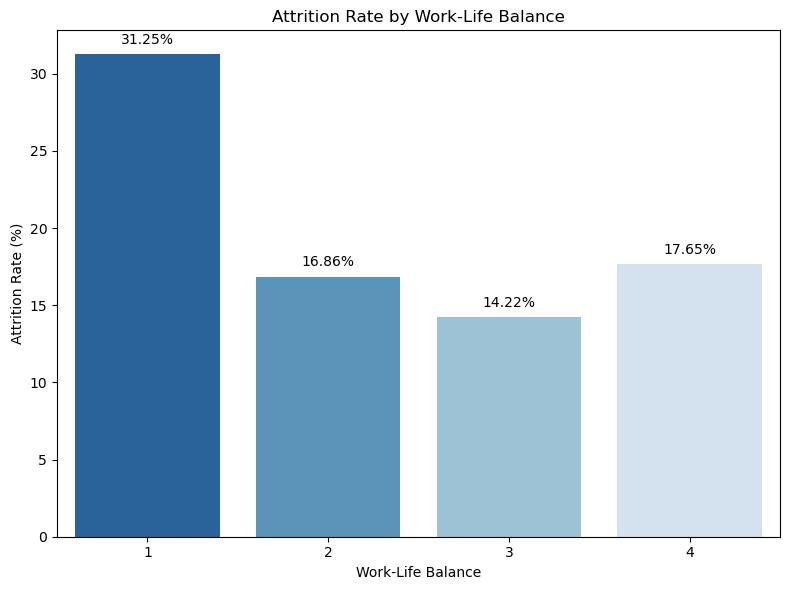

In [62]:
plt.figure(figsize=(8, 6))

# Convert attrition_rate_percent to float if it's not already
df['attrition_rate_percent'] = df['attrition_rate_percent'].astype(float)

chart = sns.barplot(data=df, x='WorkLifeBalance', y='attrition_rate_percent', palette='Blues_r')

for p in chart.patches:
    height = p.get_height()
    chart.text(
        p.get_x() + p.get_width() / 2.,  # center of bar
        height + 0.5,                    # a little above the bar
        f'{height:.2f}%',                # format with 2 decimals + %
        ha='center', va='bottom', fontsize=10
    )


plt.title("Attrition Rate by Work-Life Balance")
plt.ylabel("Attrition Rate (%)")
plt.xlabel("Work-Life Balance")
plt.tight_layout()
plt.show()

In [63]:
df = select_outputs[19]
print(df.columns.tolist())
df.head()

['JobInvolvement', 'total_employees', 'employees_left', 'attrition_rate_percent']


,JobInvolvement,total_employees,employees_left,attrition_rate_percent
0,1,83,28.0,33.73
1,2,375,71.0,18.93
2,3,868,125.0,14.40
3,4,144,13.0,9.03


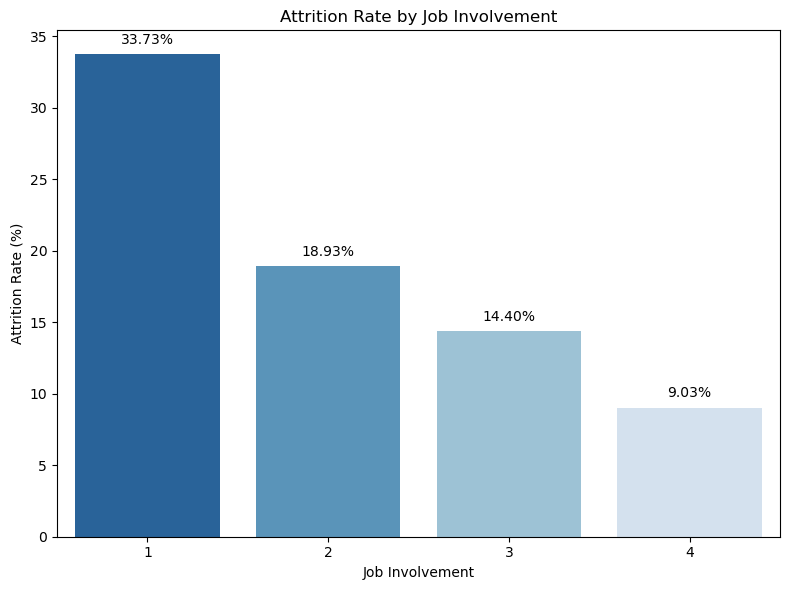

In [64]:
plt.figure(figsize=(8, 6))

# Convert attrition_rate_percent to float if it's not already
df['attrition_rate_percent'] = df['attrition_rate_percent'].astype(float)

chart = sns.barplot(data=df, x='JobInvolvement', y='attrition_rate_percent', palette='Blues_r')

for p in chart.patches:
    height = p.get_height()
    chart.text(
        p.get_x() + p.get_width() / 2.,  # center of bar
        height + 0.5,                    # a little above the bar
        f'{height:.2f}%',                # format with 2 decimals + %
        ha='center', va='bottom', fontsize=10
    )


plt.title("Attrition Rate by Job Involvement")
plt.ylabel("Attrition Rate (%)")
plt.xlabel("Job Involvement")
plt.tight_layout()
plt.show()

In [65]:
df = select_outputs[20]
print(df.columns.tolist())
df.head()

['Department', 'Gender', 'TotalEmployees', 'attrition_count', 'attrition_rate_percent']


,Department,Gender,TotalEmployees,attrition_count,attrition_rate_percent
0,Human Resources,Female,20,6.0,30.00
1,Sales,Male,257,54.0,21.01
2,Sales,Female,189,38.0,20.11
3,Research & Development,Male,582,90.0,15.46
4,Human Resources,Male,43,6.0,13.95


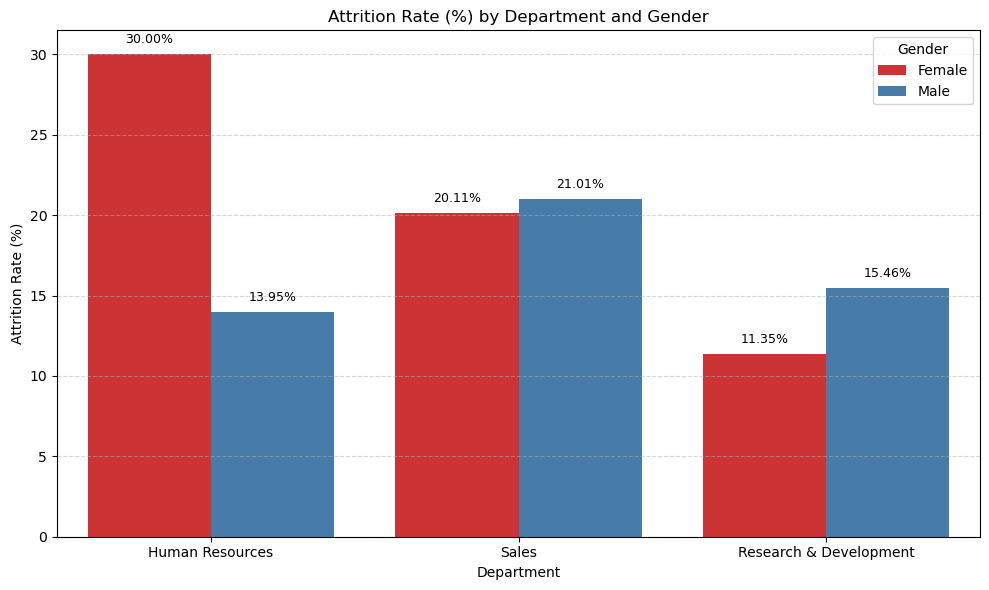

In [66]:

plt.figure(figsize=(10, 6))

# Grouped bar chart: Attrition rate by Department and Gender
ax = sns.barplot(
    data=df,
    x='Department',
    y='attrition_rate_percent',
    hue='Gender',
    palette='Set1'
)

# Add data labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 0.5,
        f'{height:.2f}%',
        ha='center', va='bottom', fontsize=9
    )

# Chart labels and style
plt.title('Attrition Rate (%) by Department and Gender')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Department')
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [67]:
df = select_outputs[21]
print(df.columns.tolist())
df.head()

['JobRole', 'WorkLifeBalance', 'TotalEmployees', 'attrition_count', 'attrition_rate_percent']


,JobRole,WorkLifeBalance,TotalEmployees,attrition_count,attrition_rate_percent
0,Sales Representative,4,9,8.0,88.89
1,Laboratory Technician,1,20,14.0,70.00
2,Sales Executive,1,12,6.0,50.00
3,Sales Representative,2,16,6.0,37.50
4,Human Resources,2,6,2.0,33.33


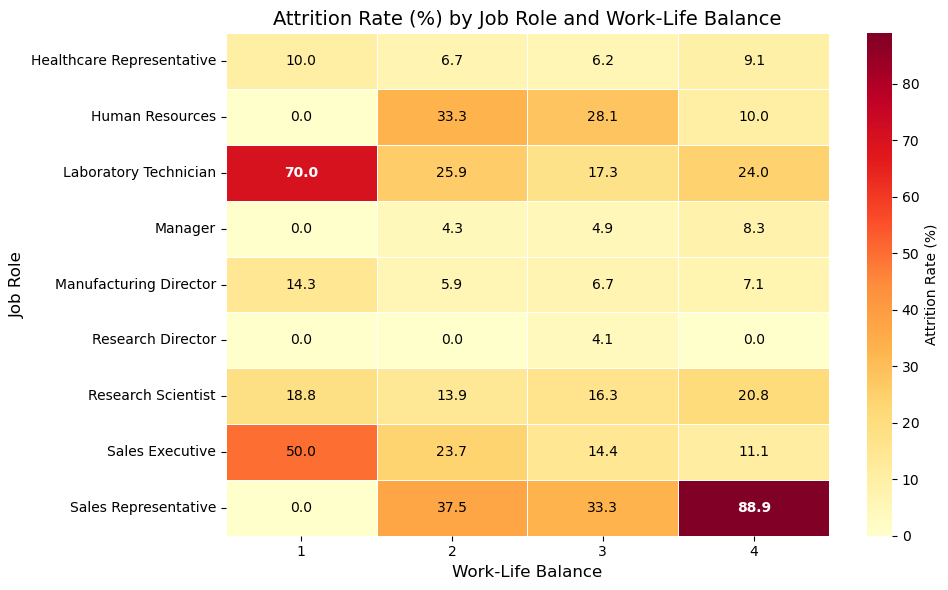

In [68]:

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Create pivot table
pivot_df = df.pivot(index='jobrole', columns='worklifebalance', values='attrition_rate_percent').fillna(0)

# Set up the heatmap
plt.figure(figsize=(10, 6))
ax = sns.heatmap(
    pivot_df,
    cmap="YlOrRd",
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'label': 'Attrition Rate (%)'},
    annot=False  # Disable built-in annotations
)

# Add custom annotations with conditional color
for i in range(pivot_df.shape[0]):           # rows (JobRole)
    for j in range(pivot_df.shape[1]):       # columns (WLB)
        value = pivot_df.iloc[i, j]
        color = 'white' if value > 50 else 'black'
        weight = 'bold' if value > 50 else 'normal'
        ax.text(
            j + 0.5, i + 0.5, f"{value:.1f}",
            ha='center', va='center',
            color=color, fontsize=10, fontweight=weight
        )

# Titles and labels
plt.title('Attrition Rate (%) by Job Role and Work-Life Balance', fontsize=14)
plt.xlabel('Work-Life Balance', fontsize=12)
plt.ylabel('Job Role', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [69]:
df = select_outputs[23]
print(df.columns.tolist())
df.head()

['TenureGroup', 'total_employees', 'employees_left', 'attrition_rate_percent']


,TenureGroup,total_employees,employees_left,attrition_rate_percent
0,Less than 1 year,44,16.0,36.36
1,1-3 Years,426,106.0,24.88
2,4-6 Years,382,49.0,12.83
3,7+ Years,618,66.0,10.68


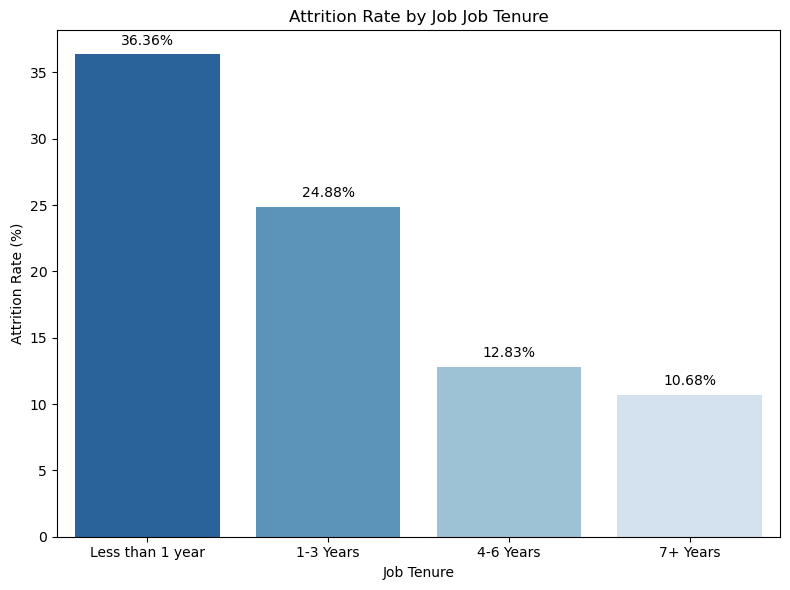

In [70]:
plt.figure(figsize=(8, 6))

# Convert attrition_rate_percent to float if it's not already
df['attrition_rate_percent'] = df['attrition_rate_percent'].astype(float)

chart = sns.barplot(data=df, x='TenureGroup', y='attrition_rate_percent', palette='Blues_r')

for p in chart.patches:
    height = p.get_height()
    chart.text(
        p.get_x() + p.get_width() / 2.,  # center of bar
        height + 0.5,                    # a little above the bar
        f'{height:.2f}%',                # format with 2 decimals + %
        ha='center', va='bottom', fontsize=10
    )


plt.title("Attrition Rate by Job Job Tenure")
plt.ylabel("Attrition Rate (%)")
plt.xlabel("Job Tenure")
plt.tight_layout()
plt.show()

In [71]:
df = select_outputs[24]
print(df.columns.tolist())
df.head()

['MaritalStatus', 'Gender', 'TotalEmployees', 'attrition_count', 'attrition_rate_percent']


,MaritalStatus,Gender,TotalEmployees,attrition_count,attrition_rate_percent
0,Single,Male,271,73.0,26.94
1,Single,Female,199,47.0,23.62
2,Married,Male,401,53.0,13.22
3,Divorced,Male,210,24.0,11.43
4,Married,Female,272,31.0,11.40


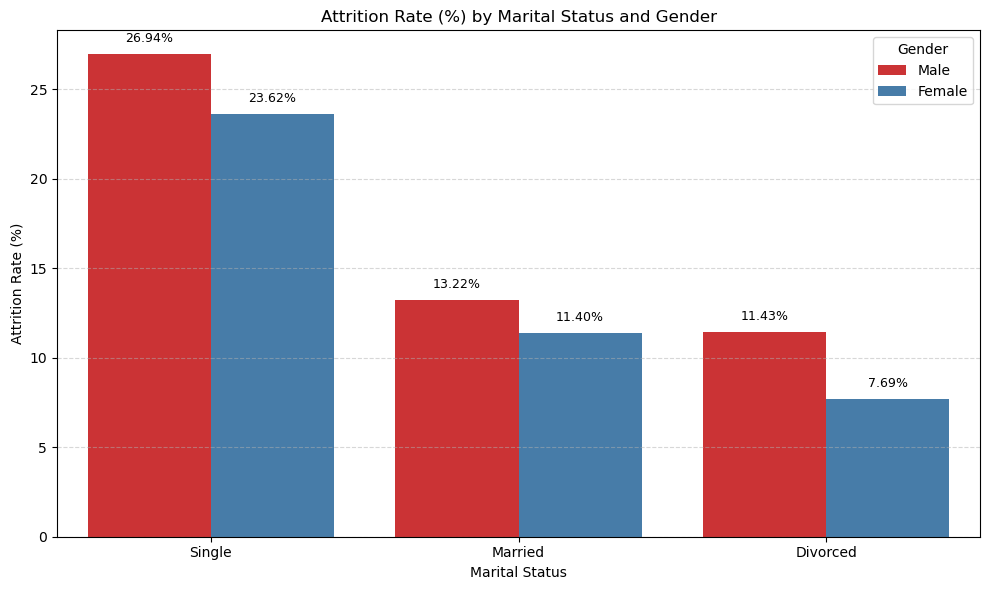

In [72]:
plt.figure(figsize=(10, 6))

# Grouped bar chart: Attrition rate by Department and Gender
ax = sns.barplot(
    data=df,
    x='MaritalStatus',
    y='attrition_rate_percent',
    hue='Gender',
    palette='Set1'
)

# Add data labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 0.5,
        f'{height:.2f}%',
        ha='center', va='bottom', fontsize=9
    )

# Chart labels and style
plt.title('Attrition Rate (%) by Marital Status and Gender')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Marital Status')
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


##### USING MACHINE LEARNING ALGORITHMS TO BETTER UNDERSTAND OUR DATA AND PREDICT RESULTS

In [73]:
data = pd.read_csv("Employee-attrition.csv")

In [74]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [4]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeNumber            1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [6]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Encode categorical features
data = pd.get_dummies(data, drop_first=True)

# Define features and target
X = data.drop('Attrition_Yes', axis=1)  # Attrition should be encoded
y = data['Attrition_Yes']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb

models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True, class_weight='balanced', random_state=42),
    "XGBoost": xgb.XGBClassifier(scale_pos_weight=3, use_label_encoder=False, eval_metric='logloss', random_state=42)
}


In [8]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

def evaluate_model(name, model, X_test, y_test, threshold=0.3):
    # Predict probabilities
    y_probs = model.predict_proba(X_test)[:, 1]

    # Apply custom threshold
    y_pred = (y_probs >= threshold).astype(int)

    # Metrics
    print(f"\n🔹 Model: {name}")
    print(classification_report(y_test, y_pred, target_names=["False", "True"]))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_probs))


In [9]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    evaluate_model(name, model, X_test_scaled, y_test, threshold=0.3)



🔹 Model: Logistic Regression
              precision    recall  f1-score   support

       False       0.94      0.66      0.77       247
        True       0.30      0.79      0.44        47

    accuracy                           0.68       294
   macro avg       0.62      0.72      0.61       294
weighted avg       0.84      0.68      0.72       294

Accuracy: 0.6768707482993197
ROC AUC: 0.7944698079076579

🔹 Model: Random Forest
              precision    recall  f1-score   support

       False       0.92      0.81      0.86       247
        True       0.39      0.64      0.48        47

    accuracy                           0.78       294
   macro avg       0.66      0.72      0.67       294
weighted avg       0.84      0.78      0.80       294

Accuracy: 0.782312925170068
ROC AUC: 0.8033422344732535

🔹 Model: Naive Bayes
              precision    recall  f1-score   support

       False       0.89      0.45      0.60       247
        True       0.20      0.70      0.31     

C:\Anaconda install\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:19:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🔹 Model: XGBoost
              precision    recall  f1-score   support

       False       0.90      0.91      0.91       247
        True       0.51      0.49      0.50        47

    accuracy                           0.84       294
   macro avg       0.71      0.70      0.70       294
weighted avg       0.84      0.84      0.84       294

Accuracy: 0.8435374149659864
ROC AUC: 0.8067878370229995


In [11]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# 1. Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'scale_pos_weight': [3]  # Ratio of negatives/positives in your resampled training set
}

# 2. Create the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# 3. Setup GridSearchCV
grid = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# 4. Fit on resampled data
grid.fit(X_train_resampled, y_train_resampled)

# 5. Best parameters
print("\n✅ Best Hyperparameters:")
print(grid.best_params_)

# 6. Evaluate best model on test set
best_xgb = grid.best_estimator_
y_probs = best_xgb.predict_proba(X_test_scaled)[:, 1]
y_pred = (y_probs >= 0.2).astype(int)

print("\n🔍 Evaluation on Test Set:")
print(classification_report(y_test, y_pred, target_names=["False", "True"]))


Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Anaconda install\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:39:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



✅ Best Hyperparameters:
{'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'scale_pos_weight': 3, 'subsample': 0.8}

🔍 Evaluation on Test Set:
              precision    recall  f1-score   support

       False       0.99      0.27      0.42       247
        True       0.20      0.98      0.34        47

    accuracy                           0.38       294
   macro avg       0.59      0.62      0.38       294
weighted avg       0.86      0.38      0.41       294



In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# 1. Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced']
}

# 2. Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# 3. Setup GridSearchCV
grid_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring='f1',  # focuses on the balance between precision and recall
    n_jobs=-1,
    verbose=1
)

# 4. Fit the model on resampled training data
grid_rf.fit(X_train_resampled, y_train_resampled)

# 5. Show best parameters
print("✅ Best Hyperparameters:")
print(grid_rf.best_params_)

# 6. Evaluate on test set
best_rf = grid_rf.best_estimator_
y_probs_rf = best_rf.predict_proba(X_test_scaled)[:, 1]
y_pred_rf = (y_probs_rf >= 0.2).astype(int)  # threshold tuning


print("\n Evaluation on Test Set:")
print(classification_report(y_test, y_pred_rf, target_names=['False', 'True']))
print("ROC AUC:", roc_auc_score(y_test, y_probs_rf))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
✅ Best Hyperparameters:
{'class_weight': 'balanced', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

 Evaluation on Test Set:
              precision    recall  f1-score   support

       False       0.97      0.59      0.73       247
        True       0.29      0.89      0.44        47

    accuracy                           0.64       294
   macro avg       0.63      0.74      0.59       294
weighted avg       0.86      0.64      0.69       294

ROC AUC: 0.798604530967353


In [20]:
from sklearn.ensemble import VotingClassifier

# Combine models using soft voting (uses predicted probabilities)
ensemble_model = VotingClassifier(
    estimators=[
        ('xgb', best_xgb),    # Your tuned XGBoost model
        ('rf', best_rf)       # Your tuned Random Forest model
    ],
    voting='soft',           # Use 'hard' if you want majority class prediction
    n_jobs=-1
)

# Train the ensemble on the resampled training data
ensemble_model.fit(X_train_resampled, y_train_resampled)

# Predict probabilities
y_probs_ensemble = ensemble_model.predict_proba(X_test_scaled)[:, 1]

# Apply a custom threshold (adjust as needed)
threshold = 0.35
y_pred_ensemble = (y_probs_ensemble >= threshold).astype(int)

# Evaluation
print("🔁 Ensemble Model Evaluation:")
print(classification_report(y_test, y_pred_ensemble, target_names=['False', 'True']))
print("ROC AUC:", roc_auc_score(y_test, y_probs_ensemble))


🔁 Ensemble Model Evaluation:
              precision    recall  f1-score   support

       False       0.94      0.80      0.86       247
        True       0.40      0.72      0.52        47

    accuracy                           0.79       294
   macro avg       0.67      0.76      0.69       294
weighted avg       0.85      0.79      0.81       294

ROC AUC: 0.8175553449909553


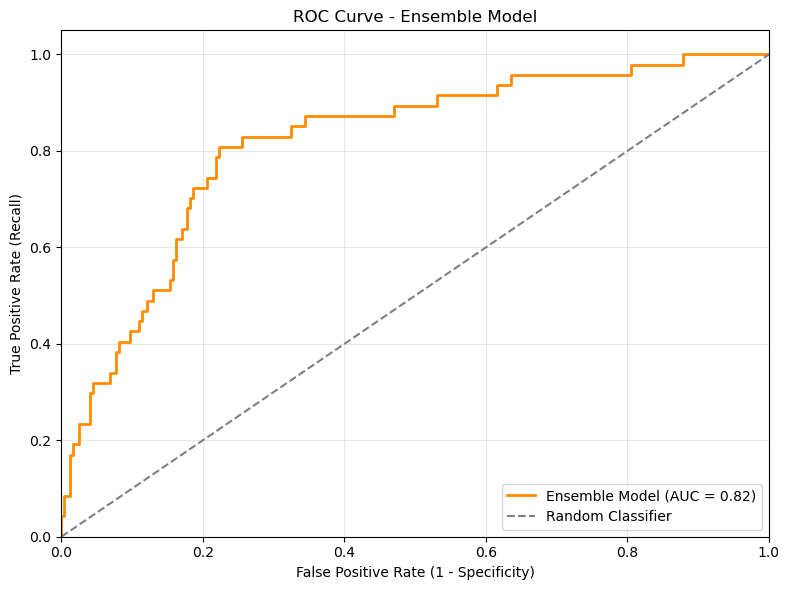

In [26]:
from sklearn.metrics import roc_curve

# Get predicted probabilities for the positive class
y_probs = ensemble_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Ensemble Model (AUC = {roc_auc:.2f})', color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Ensemble Model')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [28]:
import joblib
joblib.dump(ensemble_model, 'final_attrition_model.pkl')


['final_attrition_model.pkl']

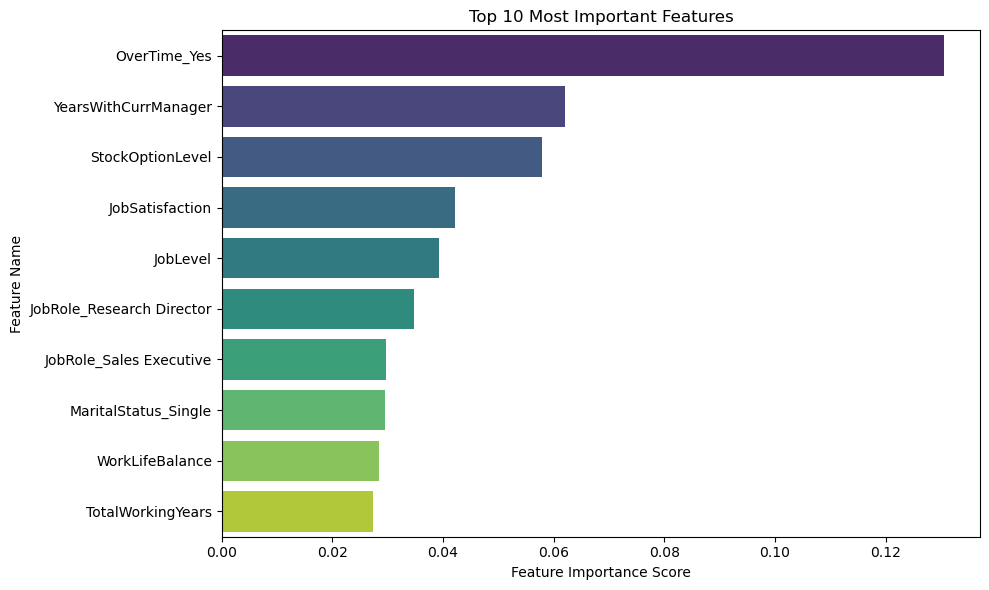

In [75]:

# Get feature importances from the model (replace with your model variable)
importances = best_xgb.feature_importances_  # or best_rf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for plotting
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df, y='Feature', x='Importance', palette='viridis')
plt.title('Top 10 Most Important Features')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()
